In [12]:
import numpy as np
import pandas as pd
from scipy.stats import f
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
from scipy.stats import ttest_1samp, ttest_ind
from statsmodels.stats.power import ttest_power
import statsmodels.api as sm
import pylab

In [13]:
df = pd.read_csv('Survey.csv')

In [6]:
df.head()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100


# Problem 2

The Student News Service at Clear Mountain State University (CMSU) has decided to gather data about the undergraduate students that attend CMSU. CMSU creates and distributes a survey of 14 questions and receives responses from 62 undergraduates (stored in the Survey.csv file).



# Part I

2.1. For this data, construct the following contingency tables (Keep Gender as row variable)


2.1.1. Gender and Major

In [10]:
df_crosstab = pd.crosstab(df.Gender,df['Major'],margins=True)
df_crosstab

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided,All
Gender,,,,,,,,,
Female,3,3,7,4,4,3,9,0,33
Male,4,1,4,2,6,4,5,3,29
All,7,4,11,6,10,7,14,3,62


2.1.2. Gender and Grad Intention

In [15]:
df_crosstab1 = pd.crosstab(df.Gender,df['Grad Intention'],margins=True)
df_crosstab1

Grad Intention,No,Undecided,Yes,All
Gender,,,,
Female,9,13,11,33
Male,3,9,17,29
All,12,22,28,62


2.1.3. Gender and Employment

In [14]:
df_crosstab2 = pd.crosstab(df.Gender,df['Employment'],margins=True)
df_crosstab2

Employment,Full-Time,Part-Time,Unemployed,All
Gender,,,,
Female,3,24,6,33
Male,7,19,3,29
All,10,43,9,62


2.1.4. Gender and Computer

In [16]:
df_crosstab3 = pd.crosstab(df.Gender,df['Computer'],margins=True)
df_crosstab3

Computer,Desktop,Laptop,Tablet,All
Gender,,,,
Female,2,29,2,33
Male,3,26,0,29
All,5,55,2,62


2.2. Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following questions:

2.2.1. What is the probability that a randomly selected CMSU student will be male?
What is the probability that a randomly selected CMSU student will be female?

In [17]:
df['Gender'].value_counts()

Female    33
Male      29
Name: Gender, dtype: int64

In [48]:
No_of_women_present = 33
Total_population_of_survey = 62
Probability = No_of_women_present/Total_population_of_survey
print('P(Randomly selected CMSU student will be female):',Probability*100,'%')

P(Randomly selected CMSU student will be female): 53.2258064516129 %


In [22]:
No_of_men_present = 29
Total_population_of_survey = 62
Probability = No_of_men_present/Total_population_of_survey
print('P(Randomly selected CMSU student will be male):',Probability*100,'%')

P(Randomly selected CMSU student will be male): 46.774193548387096 %


2.2.2. Find the conditional probability of different majors among the male students in CMSU.
Find the conditional probability of different majors among the female students of CMSU.

In [23]:
df[df['Gender']=='Male'][['Major','Gender']].groupby(df['Major']).count()

,Major,Gender
Major,,
Accounting,4,4
CIS,1,1
Economics/Finance,4,4
International Business,2,2
Management,6,6
Other,4,4
Retailing/Marketing,5,5
Undecided,3,3


In [162]:
Male_students_inGiven_dataset = 29/62
Male_students_who_has_chosen_Accounting_as_Major = 4/62
Probability_of_choosing_Accounting = Male_students_who_has_chosen_Accounting_as_Major/Male_students_inGiven_dataset
print('conditional probability of different majors(Accounting) among the male students in CMSU %1.2f' %Probability_of_choosing_Accounting,'%')

conditional probability of different majors(Accounting) among the male students in CMSU 0.14 %


In [163]:
Male_students_inGiven_dataset = 29/62
Male_students_who_has_chosen_CIS_as_Major = 1/62
Probability_of_choosing_CIS = Male_students_who_has_chosen_CIS_as_Major/Male_students_inGiven_dataset
print('conditional probability of different majors(CIS) among the male students in CMSU %1.2f' %Probability_of_choosing_CIS,'%')

conditional probability of different majors(CIS) among the male students in CMSU 0.03 %


In [164]:
Male_students_inGiven_dataset = 29/62
Male_students_who_has_chosen_EconomicsOrFinance_as_Major = 4/62
Probability_of_choosing_EconomicsOrFinance = Male_students_who_has_chosen_EconomicsOrFinance_as_Major/Male_students_inGiven_dataset
print('conditional probability of different majors(EconomicsOrFinance) among the male students in CMSU %1.2f' %Probability_of_choosing_EconomicsOrFinance,'%')

conditional probability of different majors(EconomicsOrFinance) among the male students in CMSU 0.14 %


In [165]:
Male_students_inGiven_dataset = 29/62
Male_students_who_has_chosen_International_Business_as_Major = 2/62
Probability_of_choosing_International_Business = Male_students_who_has_chosen_International_Business_as_Major/Male_students_inGiven_dataset
print('conditional probability of different majors(International Business) among the male students in CMSU %1.2f' %Probability_of_choosing_International_Business,'%')

conditional probability of different majors(International Business) among the male students in CMSU 0.07 %


In [166]:
Male_students_inGiven_dataset = 29/62
Male_students_who_has_chosen_Management_as_Major = 6/62
Probability_of_choosing_Management = Male_students_who_has_chosen_Management_as_Major/Male_students_inGiven_dataset
print('conditional probability of different majors(Management) among the male students in CMSU %1.2f' %Probability_of_choosing_Management,'%')

conditional probability of different majors(Management) among the male students in CMSU 0.21 %


In [167]:
Male_students_inGiven_dataset = 29/62
Male_students_who_has_chosen_Other_as_Major = 4/62
Probability_of_choosing_Other = Male_students_who_has_chosen_Other_as_Major/Male_students_inGiven_dataset
print('conditional probability of different majors(Other) among the male students in CMSU %1.2f' %Probability_of_choosing_Other,'%')

conditional probability of different majors(Other) among the male students in CMSU 0.14 %


In [169]:
Male_students_inGiven_dataset = 29/62
Male_students_who_has_chosen_RetailingOrMarketing_as_Major = 5/62
Probability_of_choosing_RetailingOrMarketing = Male_students_who_has_chosen_RetailingOrMarketing_as_Major/Male_students_inGiven_dataset
print('conditional probability of different majors(Retailing/Marketing) among the male students in CMSU %1.2f' %Probability_of_choosing_RetailingOrMarketing,'%')

conditional probability of different majors(Retailing/Marketing) among the male students in CMSU 0.17 %


In [170]:
Male_students_inGiven_dataset = 29/62
Male_students_who_has_not_decided_their_Major = 3/62
Probability_of_not_deciding = Male_students_who_has_not_decided_their_Major/Male_students_inGiven_dataset
print('conditional probability of not deciding any major among the male students in CMSU %1.2f' %Probability_of_not_deciding,'%')

conditional probability of not deciding any major among the male students in CMSU 0.10 %


In [102]:
df[df['Gender']=='Female'][['Major','Gender']].groupby(df['Major']).count()

,Major,Gender
Major,,
Accounting,3,3
CIS,3,3
Economics/Finance,7,7
International Business,4,4
Management,4,4
Other,3,3
Retailing/Marketing,9,9


In [171]:
Female_students_inGiven_dataset = 33/62
Female_students_who_has_chosen_Accounting_as_Major = 3/62
Probability_of_choosing_Accounting = Female_students_who_has_chosen_Accounting_as_Major/Female_students_inGiven_dataset
print('conditional probability of different majors(Accounting) among the Female students in CMSU %1.2f' %Probability_of_choosing_Accounting,'%')

conditional probability of different majors(Accounting) among the Female students in CMSU 0.09 %


In [172]:
Female_students_inGiven_dataset = 33/62
Female_students_who_has_chosen_CIS_as_Major = 3/62
Probability_of_choosing_CIS = Female_students_who_has_chosen_CIS_as_Major/Female_students_inGiven_dataset
print('conditional probability of diffb hb gherent majors(CIS) among the Female students in CMSU %1.2f' %Probability_of_choosing_CIS,'%')

conditional probability of diffb hb gherent majors(CIS) among the Female students in CMSU 0.09 %


In [173]:
Female_students_inGiven_dataset = 33/62
Female_students_who_has_chosen_EconomicsOrFinance_as_Major = 7/62
Probability_of_choosing_EconomicsOrFinance = Female_students_who_has_chosen_EconomicsOrFinance_as_Major/Female_students_inGiven_dataset
print('conditional probability of different majors(EconomicsOrFinance) among the Female students in CMSU %1.2f' %Probability_of_choosing_EconomicsOrFinance,'%')

conditional probability of different majors(EconomicsOrFinance) among the Female students in CMSU 0.21 %


In [174]:
Female_students_inGiven_dataset = 33/62
Female_students_who_has_chosen_International_Business_as_Major = 4/62
Probability_of_choosing_International_Business = Female_students_who_has_chosen_International_Business_as_Major/Female_students_inGiven_dataset
print('conditional probability of different majors(International Business) among the male students in CMSU %1.2f' %Probability_of_choosing_International_Business,'%')

conditional probability of different majors(International Business) among the male students in CMSU 0.12 %


In [175]:
Female_students_inGiven_dataset = 33/62
Male_students_who_has_chosen_Management_as_Major = 4/62
Probability_of_choosing_Management = Male_students_who_has_chosen_Management_as_Major/Male_students_inGiven_dataset
print('conditional probability of different majors(Management) among the male students in CMSU %1.2f' %Probability_of_choosing_Management,'%')

conditional probability of different majors(Management) among the male students in CMSU 0.14 %


In [177]:
Female_students_inGiven_dataset = 33/62
Female_students_who_has_chosen_Other_as_Major = 3/62
Probability_of_choosing_Other = Female_students_who_has_chosen_Other_as_Major/Female_students_inGiven_dataset
print('conditional probability of different majors(Other) among the Female students in CMSU %1.2f' %Probability_of_choosing_Other,'%')

conditional probability of different majors(Other) among the Female students in CMSU 0.09 %


In [178]:
Female_students_inGiven_dataset = 33/62
Female_students_who_has_chosen_RetailingOrMarketing_as_Major = 9/62
Probability_of_choosing_RetailingOrMarketing = Female_students_who_has_chosen_RetailingOrMarketing_as_Major/Female_students_inGiven_dataset
print('conditional probability of different majors(Retailing/Marketing) among the Female students in CMSU %1.2f' %Probability_of_choosing_RetailingOrMarketing,'%')

conditional probability of different majors(Retailing/Marketing) among the Female students in CMSU 0.27 %


2.2.3. Find the conditional probability of intent to graduate, given that the student is a male.
Find the conditional probability of intent to graduate, given that the student is a female.


In [68]:
df['Grad Intention'].value_counts()

Yes          28
Undecided    22
No           12
Name: Grad Intention, dtype: int64

In [85]:
df[df['Grad Intention']=='Yes'].groupby(df['Gender']).count()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
Gender,,,,,,,,,,,,,,
Female,11,11,11,11,11,11,11,11,11,11,11,11,11,11
Male,17,17,17,17,17,17,17,17,17,17,17,17,17,17


In [3]:
Given_that_student_is_Male = 29/62
Intent_to_Graduate_when_Yes_and_Male = 17/62
Probability_of_Graduating_when_Male = Intent_to_Graduate_when_Yes_and_Male/Given_that_student_is_Male
print('Conditional probability of intent to graduate, given that the student is a male:', Probability_of_Graduating_when_Male*100,'%')

Conditional probability of intent to graduate, given that the student is a male: 58.620689655172406 %


In [5]:
Given_that_student_is_Female = 33/62
Intent_to_Graduate_when_Yes_and_Female = 11/62
Probability_of_Graduating_when_Female = Intent_to_Graduate_when_Yes_and_Female/Given_that_student_is_Female
print('Conditional probability of intent to graduate, given that the student is a Female:', Probability_of_Graduating_when_Female*100,'%')

Conditional probability of intent to graduate, given that the student is a Female: 33.333333333333336 %


In [90]:
df[df['Grad Intention']=='Undecided'].groupby(df['Gender']).count()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
Gender,,,,,,,,,,,,,,
Female,13,13,13,13,13,13,13,13,13,13,13,13,13,13
Male,9,9,9,9,9,9,9,9,9,9,9,9,9,9


In [6]:
student_is_Male = 29/62
Intent_to_Graduate_when_Undecided_and_Male = 9/62
Probability_of_not_deciding_when_Male = Intent_to_Graduate_when_Undecided_and_Male/student_is_Male
print('Conditional probability of intent to graduate, given that the student is a male:', Probability_of_not_deciding_when_Male*100,'%')

Conditional probability of intent to graduate, given that the student is a male: 31.034482758620697 %


In [7]:
student_is_Female = 33/62
Intent_to_Graduate_when_Undecided_and_Female = 13/62
Probability_of_not_deciding_when_Female = Intent_to_Graduate_when_Undecided_and_Female/student_is_Female
print('Conditional probability of intent to graduate, given that the student is a Female:', Probability_of_not_deciding_when_Female*100,'%')

Conditional probability of intent to graduate, given that the student is a Female: 39.3939393939394 %


In [91]:
df[df['Grad Intention']=='No'].groupby(df['Gender']).count()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
Gender,,,,,,,,,,,,,,
Female,9,9,9,9,9,9,9,9,9,9,9,9,9,9
Male,3,3,3,3,3,3,3,3,3,3,3,3,3,3


In [8]:
student_is_Male = 29/62
Intent_to_Graduate_when_NO_and_Male = 3/62
Probability_of_not_Graduating_when_Male = Intent_to_Graduate_when_NO_and_Male/student_is_Male
print('Conditional probability of intent to graduate, given that the student is a male:', Probability_of_not_Graduating_when_Male*100,'%')

Conditional probability of intent to graduate, given that the student is a male: 10.344827586206897 %


In [9]:
student_is_Female = 33/62
Intent_to_Graduate_when_NO_and_Female = 9/62
Probability_of_not_Graduating_when_Female = Intent_to_Graduate_when_NO_and_Female/student_is_Female
print('Conditional probability of intent to graduate, given that the student is a Female:', Probability_of_not_Graduating_when_Female*100,'%')

Conditional probability of intent to graduate, given that the student is a Female: 27.272727272727277 %


2.2.4. Find the conditional probability of employment status for the male students as well as for the female students.

In [138]:
df[df['Gender']=='Male'].groupby(df['Employment']).count()['Gender']

Employment
Full-Time      7
Part-Time     19
Unemployed     3
Name: Gender, dtype: int64

In [139]:
df['Employment'].value_counts()

Part-Time     43
Full-Time     10
Unemployed     9
Name: Employment, dtype: int64

In [145]:
Probability_empStatus_is_FullTime_and_Male = 7/62
Probability_that_Gender_is_Male = 29/62
Conditional_Probability = Probability_empStatus_is_FullTime_and_Male/Probability_that_Gender_is_Male
print('Conditional probability of employment status for the male students:', Conditional_Probability*100,'%')

Conditional probability of employment status for the male students: 24.137931034482758 %


In [146]:
Probability_empStatus_is_PartTime_and_Male = 19/62
Probability_that_Gender_is_Male = 29/62
Conditional_Probability = Probability_empStatus_is_PartTime_and_Male/Probability_that_Gender_is_Male
print('Conditional probability of employment status for the male students:', Conditional_Probability*100,'%')

Conditional probability of employment status for the male students: 65.51724137931035 %


In [147]:
Probability_empStatus_is_Unemployed_and_Male = 3/62
Probability_that_Gender_is_Male = 29/62
Conditional_Probability = Probability_empStatus_is_Unemployed_and_Male/Probability_that_Gender_is_Male
print('Conditional probability of employment status for the male students:', Conditional_Probability*100,'%')

Conditional probability of employment status for the male students: 10.344827586206897 %


In [149]:
df[df['Gender']=='Female'].groupby(df['Employment']).count()['Gender']

Employment
Full-Time      3
Part-Time     24
Unemployed     6
Name: Gender, dtype: int64

In [153]:
Probability_empStatus_is_FullTime_and_Female = 3/62
Probability_that_Gender_is_Female = 33/62
Conditional_Probability = Probability_empStatus_is_FullTime_and_Female/Probability_that_Gender_is_Female
print('Conditional probability of employment status for the female students:', Conditional_Probability*100,'%')

Conditional probability of employment status for the male students: 9.090909090909092 %


In [154]:
Probability_empStatus_is_PartTime_and_Female = 24/62
Probability_that_Gender_is_Female = 29/62
Conditional_Probability = Probability_empStatus_is_PartTime_and_Female/Probability_that_Gender_is_Female
print('Conditional probability of employment status for the female students:', Conditional_Probability*100,'%')

Conditional probability of employment status for the female students: 82.75862068965517 %


In [155]:
Probability_empStatus_is_Unemployed_and_Female = 6/62
Probability_that_Gender_is_Female = 29/62
Conditional_Probability = Probability_empStatus_is_Unemployed_and_Female/Probability_that_Gender_is_Female
print('Conditional probability of employment status for the female students:', Conditional_Probability*100,'%')

Conditional probability of employment status for the female students: 20.689655172413794 %


2.2.5. Find the conditional probability of laptop preference among the male students as well as among the female students.

In [156]:
df['Computer'].value_counts()

Laptop     55
Desktop     5
Tablet      2
Name: Computer, dtype: int64

In [158]:
df[df['Gender']=='Male'].groupby(df['Computer']).count()['Gender']

Computer
Desktop     3
Laptop     26
Name: Gender, dtype: int64

In [1]:
Probability_of_preferring_Laptop_Male = 26/62
Probability_that_the_person_is_male = 29/62
Conditional_Probability = Probability_of_preferring_Laptop_Male/Probability_that_the_person_is_male
print('Conditional probability of laptop preference among the male students:', Conditional_Probability*100,'%')

Conditional probability of laptop preference among the male students: 89.65517241379311 %


In [159]:
df[df['Gender']=='Female'].groupby(df['Computer']).count()['Gender']

Computer
Desktop     2
Laptop     29
Tablet      2
Name: Gender, dtype: int64

In [161]:
Probability_of_preferring_Laptop_Female = 29/62
Probability_that_the_person_is_female = 33/62
Conditional_Probability = Probability_of_preferring_Laptop_Female/Probability_that_the_person_is_female
print('Conditional probability of laptop preference among the female students:', Conditional_Probability*100,'%')

Conditional probability of laptop preference among the female students: 87.87878787878788 %


2.3. Based on the above probabilities, do you think that the column variable in each case is independent of Gender?
Justify your comment in each case.

2.4. Note that there are three numerical (continuous) variables in the data set, Salary, Spending and Text Messages. For each of them comment whether they follow a normal distribution.
Write a note summarizing your conclusions.

Text(0.5, 1.0, 'QQ Plot of Salary')

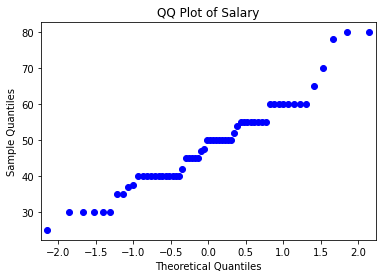

In [27]:
sm.qqplot(df['Salary'])
plt.title('QQ Plot of Salary')

Text(0.5, 1.0, 'QQ Plot of Spending')

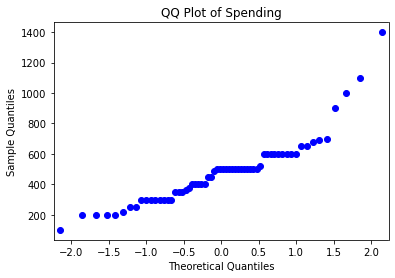

In [28]:
sm.qqplot(df['Spending'])
plt.title('QQ Plot of Spending')

Text(0.5, 1.0, 'QQ Plot of Text Messages')

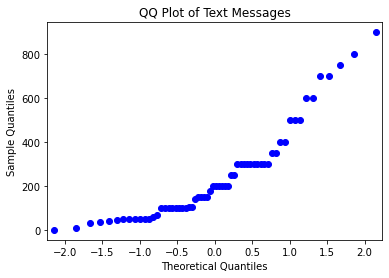

In [29]:
sm.qqplot(df['Text Messages'])
plt.title('QQ Plot of Text Messages')

In [10]:
from scipy.stats import shapiro  

In [15]:
stat, p = shapiro(df['Salary'])
p

0.028000956401228905

<AxesSubplot:xlabel='Salary'>

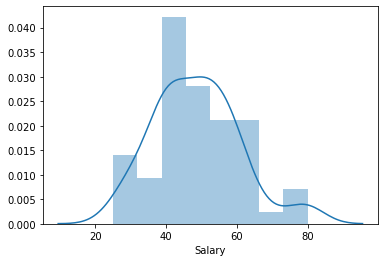

In [17]:
sns.distplot(df['Salary'])

In [19]:
from scipy.stats import normaltest
stat, p = normaltest(df['Salary'])
p

0.14618172494628334

In [20]:
stat, p = shapiro(df['Spending'])
p

1.6854661225806922e-05

<AxesSubplot:xlabel='Spending'>

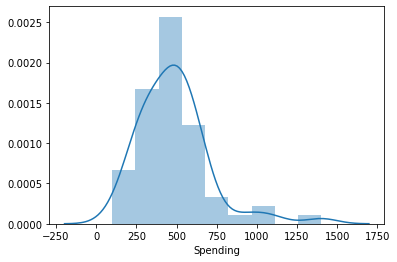

In [21]:
sns.distplot(df['Spending'])

In [25]:
stat, p = normaltest(df['Spending'])
p

2.387587398454289e-07

In [23]:
stat, p = shapiro(df['Text Messages'])
p

4.324040673964191e-06

<AxesSubplot:xlabel='Text Messages'>

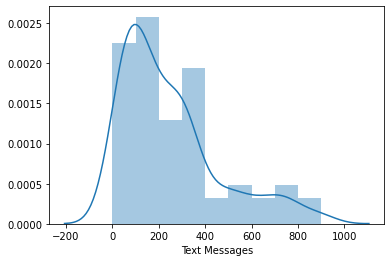

In [24]:
sns.distplot(df['Text Messages'])

In [26]:
stat, p = normaltest(df['Text Messages'])
p

0.0002819512224692029